In [1]:
#täsä tehtävässä toin dataa, tutkin mitä se sisältää ja tein sijainteja havainnollistavan viusalisoinnin
import pandas as pd
#tuodaan datasetti
df = pd.read_csv('listings.csv')  # Käytin kurssin github repon abnb dataa
#tarkastellaan miltäs se näyttää ekan 10 rivin demona
df.head(10)

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,0,18628,https://www.airbnb.com/rooms/18628,20180116205114,2018-01-17,Greta Studio Wifi Chueca en Madrid,The small details make this apartment a joyful...,The small details make this apartment a joyful...,The small details make this apartment a joyful...,none,...,t,NaN,NaN,t,f,strict,f,f,1,0.40
1,1,19864,https://www.airbnb.com/rooms/19864,20180116205114,2018-01-17,"PLAZA MAYOR (wifi, air conditioning)",Cosy small studio with a nice balcony close to...,THE PLACE: This small studio is located on the...,Cosy small studio with a nice balcony close to...,none,...,t,NaN,NaN,t,f,strict,f,f,1,0.81
2,2,21512,https://www.airbnb.com/rooms/21512,20180116205114,2018-01-17,Studio in Plaza de España,Studio fully equipped and conditioned vacation...,Studio fully equipped and conditioned vacation...,Studio fully equipped and conditioned vacation...,none,...,t,NaN,NaN,f,f,flexible,f,f,7,0.39
3,3,21853,https://www.airbnb.com/rooms/21853,20180116205114,2018-01-17,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,We have a quiet and sunny room with a good vie...,none,...,t,NaN,NaN,f,f,strict,f,f,2,0.65
4,4,23021,https://www.airbnb.com/rooms/23021,20180116205114,2018-01-17,Elegant Apartment in Spain Square,NaN,"Luxury apartment in the Plaza of Spain, three ...","Luxury apartment in the Plaza of Spain, three ...",none,...,t,NaN,NaN,f,f,moderate,f,f,7,0.93
5,5,24805,https://www.airbnb.com/rooms/24805,20180116205114,2018-01-17,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...",LOCATION. Brand new flats near the Atlantic H...,"Studio located 50 meters from Gran Via, next t...",none,...,t,NaN,NaN,f,f,strict,f,f,2,0.05
6,6,24836,https://www.airbnb.com/rooms/24836,20180116205114,2018-01-17,"Select the Madrid more ""cool"".",Apartamento céntrico junto a Gran Vía (VT-296)...,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...","Select the Madrid more ""cool"" : 70 m, 2 bedroo...",none,...,t,VT-296,NaN,f,f,moderate,f,f,1,0.48
7,7,26816,https://www.airbnb.com/rooms/26816,20180116205114,2018-01-17,Nice and Cozy Apart. in Agosto-sept,NaN,Nice and cozy apartment situated in a quiet ne...,Nice and cozy apartment situated in a quiet ne...,none,...,t,NaN,NaN,f,f,strict,f,f,3,0.07
8,8,26823,https://www.airbnb.com/rooms/26823,20180116205114,2018-01-17,Roon for two people,NaN,Room for two person with dressing room and bat...,Room for two person with dressing room and bat...,none,...,t,NaN,NaN,f,f,flexible,f,f,3,0.30
9,9,26825,https://www.airbnb.com/rooms/26825,20180116205114,2018-01-17,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,Nice and cozy roon for one person with a priva...,Nice and cozy roon for one person with a priva...,none,...,t,NaN,NaN,f,f,strict,f,f,3,0.97


In [2]:
#tarkistetaan tietorakenteen koko kokonaisuudessaan eikä vaan paria ekaa
df.shape

(16313, 97)

In [3]:
#nyt tiedetään että asuntoja on listattu 8739 ja nistä kaikista on koottu 18 ominaisuutta
#tarkistetaan onko jokaisen listauksen id yksiselitteinen/ ei duplikaatteja
df['id'].is_unique

True

In [4]:
#asetetaan yksikäsitteinen id indeksiksiksi
df.set_index('id', inplace=True)

In [5]:
#tarkisttaan millaisia datatyyppejä tiedosto sisältää
#tarkistetaan mahdollisesti virheelliset datatyyypit
df.dtypes

Unnamed: 0                            int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 96, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16313 entries, 18628 to 22772175
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        16313 non-null  int64  
 1   listing_url                       16313 non-null  object 
 2   scrape_id                         16313 non-null  int64  
 3   last_scraped                      16313 non-null  object 
 4   name                              16302 non-null  object 
 5   summary                           15860 non-null  object 
 6   space                             11798 non-null  object 
 7   description                       16305 non-null  object 
 8   experiences_offered               16313 non-null  object 
 9   neighborhood_overview             10343 non-null  object 
 10  notes                             6734 non-null   object 
 11  transit                           10186 non-null  object 
 12  ac

In [7]:
#huomataan että neihgbourhood_gruop on kaikissa tyhjänä joten otetaan se sarake pois
df = df.drop('jurisdiction_names', axis=1) # Muutettiin tämä koodi, koska alkuperäinen koodi ei toiminut kurssin githun repon datalla
df.head(10)

,Unnamed: 0,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
18628,0,https://www.airbnb.com/rooms/18628,20180116205114,2018-01-17,Greta Studio Wifi Chueca en Madrid,The small details make this apartment a joyful...,The small details make this apartment a joyful...,The small details make this apartment a joyful...,none,"The neighborhood is quiet and friendly, the ne...",...,9.0,t,NaN,t,f,strict,f,f,1,0.40
19864,1,https://www.airbnb.com/rooms/19864,20180116205114,2018-01-17,"PLAZA MAYOR (wifi, air conditioning)",Cosy small studio with a nice balcony close to...,THE PLACE: This small studio is located on the...,Cosy small studio with a nice balcony close to...,none,The studio is located in the city center at a ...,...,9.0,t,NaN,t,f,strict,f,f,1,0.81
21512,2,https://www.airbnb.com/rooms/21512,20180116205114,2018-01-17,Studio in Plaza de España,Studio fully equipped and conditioned vacation...,Studio fully equipped and conditioned vacation...,Studio fully equipped and conditioned vacation...,none,NaN,...,8.0,t,NaN,f,f,flexible,f,f,7,0.39
21853,3,https://www.airbnb.com/rooms/21853,20180116205114,2018-01-17,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,We have a quiet and sunny room with a good vie...,none,We live in a leafy neighbourhood with plenty o...,...,9.0,t,NaN,f,f,strict,f,f,2,0.65
23021,4,https://www.airbnb.com/rooms/23021,20180116205114,2018-01-17,Elegant Apartment in Spain Square,NaN,"Luxury apartment in the Plaza of Spain, three ...","Luxury apartment in the Plaza of Spain, three ...",none,NaN,...,8.0,t,NaN,f,f,moderate,f,f,7,0.93
24805,5,https://www.airbnb.com/rooms/24805,20180116205114,2018-01-17,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...",LOCATION. Brand new flats near the Atlantic H...,"Studio located 50 meters from Gran Via, next t...",none,"The area is next to the Gran Via, so people li...",...,10.0,t,NaN,f,f,strict,f,f,2,0.05
24836,6,https://www.airbnb.com/rooms/24836,20180116205114,2018-01-17,"Select the Madrid more ""cool"".",Apartamento céntrico junto a Gran Vía (VT-296)...,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...","Select the Madrid more ""cool"" : 70 m, 2 bedroo...",none,"Cosmopolita, lleno de locales de moda, restaur...",...,10.0,t,VT-296,f,f,moderate,f,f,1,0.48
26816,7,https://www.airbnb.com/rooms/26816,20180116205114,2018-01-17,Nice and Cozy Apart. in Agosto-sept,NaN,Nice and cozy apartment situated in a quiet ne...,Nice and cozy apartment situated in a quiet ne...,none,NaN,...,8.0,t,NaN,f,f,strict,f,f,3,0.07
26823,8,https://www.airbnb.com/rooms/26823,20180116205114,2018-01-17,Roon for two people,NaN,Room for two person with dressing room and bat...,Room for two person with dressing room and bat...,none,NaN,...,9.0,t,NaN,f,f,flexible,f,f,3,0.30


In [8]:
df.shape

(16313, 95)

<Axes: xlabel='longitude', ylabel='latitude'>

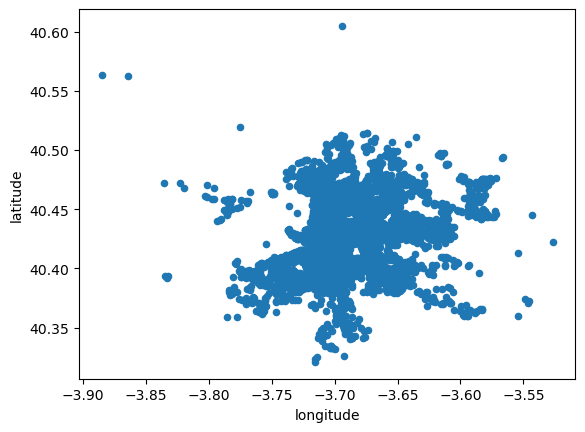

In [9]:
#nyt sarakkeita on kaksi vähemmän koska id -> indeksiluku ja tiputettiin tyhjä sarake
#tehdään kartta sijainneista että nähdään miten asunnot kaupungissa asettuu
df.plot(kind='scatter', x='longitude', y='latitude')

In [10]:
#lopuksi voitaisiin vielä tsekata vaikka että millaisia airbnb asuntoja alueella on suurimmaksi osaksi
df.groupby('room_type').count()

,Unnamed: 0,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,10338,10338,10338,10338,10333,10047,7997,10334,10338,6894,...,8603,10338,1461,10338,10338,10338,10338,10338,10338,8704
Private room,5768,5768,5768,5768,5762,5611,3654,5764,5768,3317,...,4330,5768,50,5768,5768,5768,5768,5768,5768,4405
Shared room,207,207,207,207,207,202,147,207,207,132,...,149,207,0,207,207,207,207,207,207,152


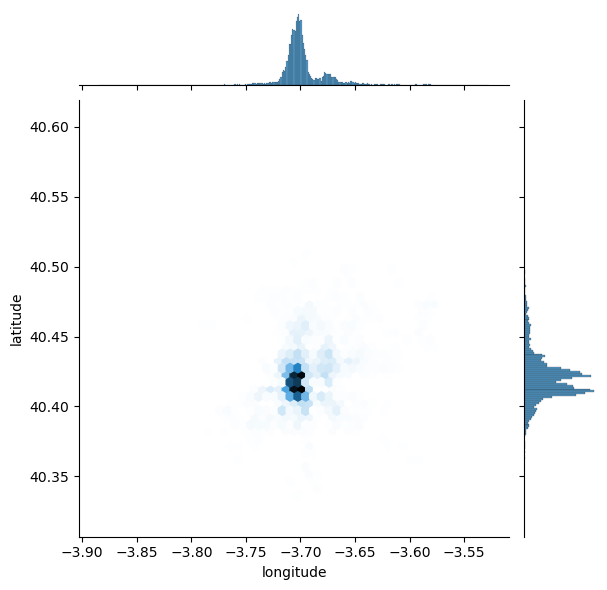

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tehdään sns jointplot, joka on scatterplot mutta paremmilla ominaisuuksilla
sns.jointplot(x='longitude', y='latitude', data=df, kind='hex')
plt.show()


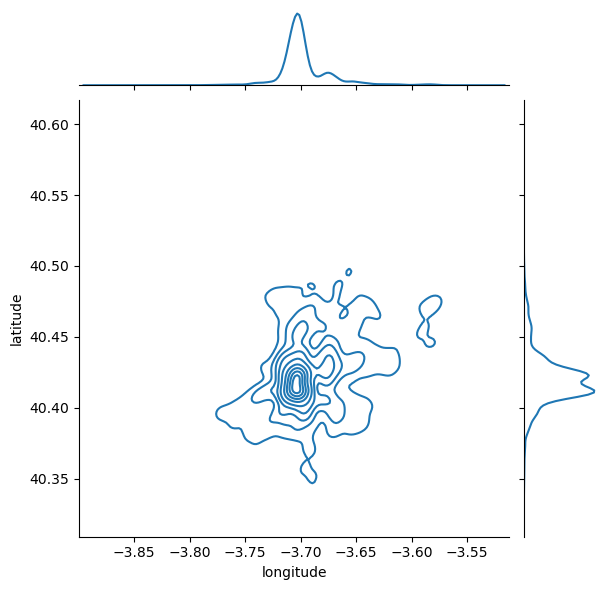

In [12]:
# Vielä kerneliarviolla sama homma
sns.jointplot(x='longitude', y='latitude', data=df, kind='kde')
plt.show()